importing modules 

In [15]:
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.metrics import  accuracy_score,f1_score
import matplotlib.pyplot as plt

 
 - reading the data and checking whether there is missing values and removing it using dropna.
 - we also need to standardize the data
 - add we need to enocode both labels and features
 - i also removed the year attirbute because it not important

In [16]:
data=read_csv("../data/penguins.csv")
isMissing=data.isna().any().any()
if isMissing :
   data=data.dropna()
isMissing=data.isna().any().any()
x=data.drop(columns=["species","year"],axis=1)
y=data["species"]
label_encoder=LabelEncoder()
one_hot_encoder=OneHotEncoder()
x=one_hot_encoder.fit_transform(x)
y=label_encoder.fit_transform(y)

splitting the data to test and train

In [17]:
xTrain,xTest,yTrain,yTest=train_test_split(x,y,random_state=42,test_size=0.2)

creating our models as list then will loop through to:

- train each
- predict for each 
- caclulate the metric accuracy and f1_score
- finally plotting

In [18]:
models=[
  (SVC(kernel="linear"),"Simple linear svm"),
  (RandomForestClassifier(n_estimators=100),"Random forrest"),
  (BaggingClassifier(),"BaggingClassifier"),
  (AdaBoostClassifier(),"Ada boost classifier")
]


Simple linear svm
Accuracy score is : 0.7910447761194029
F1 score is : 0.7910447761194029
Random forrest
Accuracy score is : 0.7611940298507462
F1 score is : 0.7611940298507462
BaggingClassifier
Accuracy score is : 0.746268656716418
F1 score is : 0.746268656716418


/home/empty/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Ada boost classifier
Accuracy score is : 0.746268656716418
F1 score is : 0.746268656716418


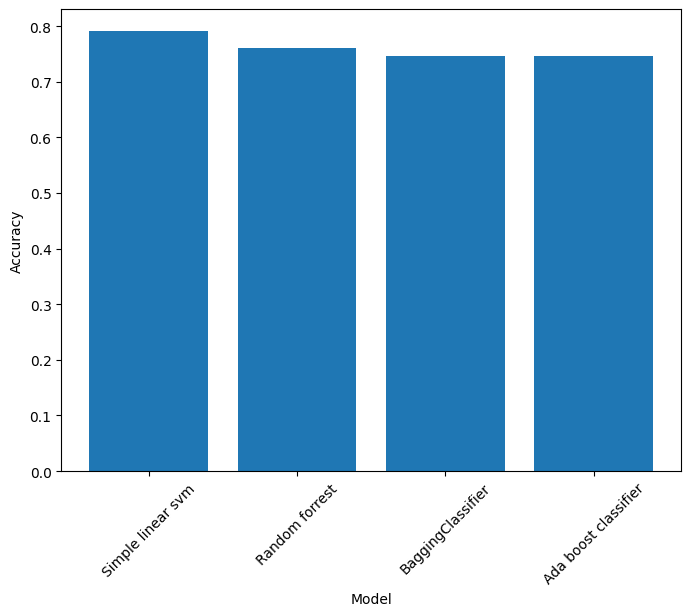

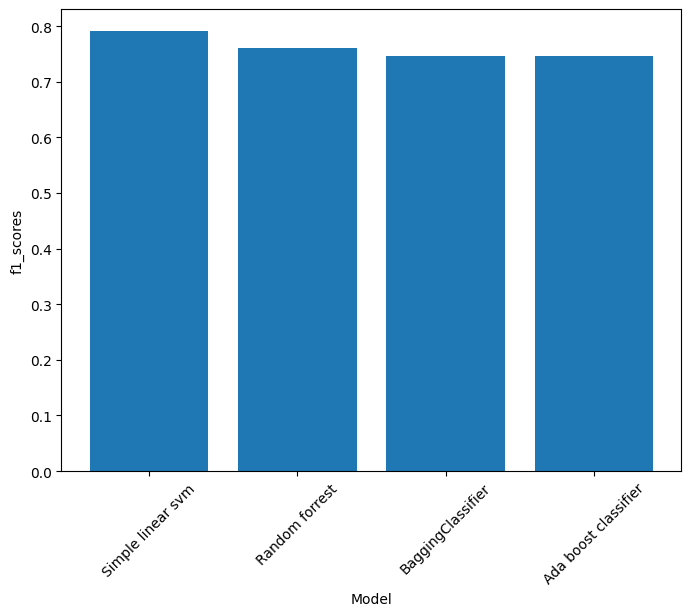

In [19]:
accuracies=[]
f1Scores=[]

for (model,description) in models:
  model.fit(xTrain,yTrain)
  pred=model.predict(xTest)
  print(description)
  accuracyScore=accuracy_score(y_pred=pred,y_true=yTest)
  f1Score=f1_score(y_pred=pred,y_true=yTest,average="micro")
  accuracies.append(accuracyScore)
  f1Scores.append(f1Score)
  print("Accuracy score is : "+str(accuracyScore))
  print("F1 score is : "+str(f1Score))


plt.figure(figsize=(8, 6))
plt.bar([model[1] for model in models], accuracies)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
plt.bar([model[1] for model in models], f1Scores)
plt.xlabel("Model")
plt.ylabel("f1_scores")
plt.xticks(rotation=45)
plt.show()

The Simple Linear SVM model performed the best with an accuracy of 0.79 and an F1 score of 0.79. The Ada Boost Classifier and Random Forest models had comparable performances with accuracy scores around 0.75 and 0.72, respectively. The BaggingClassifier model lagged slightly behind with an accuracy of 0.73.